## **Explorando a biblioteca `PyOD` para detecção de _outliers_**
---

Nesse notebook iremos explorar a biblioteca `PyOD` para detecção de _outliers_ ou anomalias em conjunto de dados.

Utilizando a função **generate_data** iremos gerar dados sintéticos e a função **KNN** (K-nearest neighbors, ou “K-vizinhos mais próximos”) da mesma biblioteca para aplicação de técnicas baseado em proximidade para "rotular" os _outliers_.



**Saiba mais!**
- [Welcome to PyOD documentation!](https://pyod.readthedocs.io/en/latest/)

Para instalar a _library_ utilize o comando abaixo.

`pip install pyod`

In [1]:
# importando as bibliotecas
import pandas as pd                       # análise e manipulação de dados
import numpy as np                        # recursos matemáticos
import matplotlib.pyplot as plt           # visualização gráfica
import seaborn as sns                     # visualização gráfica
from pyod.utils.data import generate_data # gerar dados sintéticos

# configurando o ambiente de exibição
%matplotlib inline
sns.set()

In [38]:
# utilizando a função "generate_data" para gerar os dados de treino e teste de duas dimensões
Xtrain, ytrain = generate_data(n_train=1_000, train_only=True, n_features=2)

# contabilizando a quantidade de observações em cada subconjunto
len(Xtrain), len(ytrain)

(1000, 1000)

In [39]:
# visualizando as 10 primeiras observações dos dados de treino e teste
print(
    Xtrain[:10], 
    ytrain[:10], 
    sep='\n\n'
)

[[5.32560654 4.5571503 ]
 [4.96836053 4.57183408]
 [4.92511533 4.59177194]
 [5.07398987 4.49107163]
 [5.1193358  5.48265676]
 [4.91239172 5.114589  ]
 [4.67122006 5.31908567]
 [4.88423006 4.74170037]
 [4.9219356  4.85219727]
 [5.11287814 4.80273541]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
# realizando o redimensionamento dos dados
data_x = Xtrain[:, [0]].reshape(-1,1)
data_y = Xtrain[:, [1]].reshape(-1,1)

In [41]:
# visualizando as 5 primeiras observações
print(f'data_x:\n{data_x[:5]}', 
      f'data_y:\n{data_y[:5]}', 
      sep='\n\n')

data_x:
[[5.32560654]
 [4.96836053]
 [4.92511533]
 [5.07398987]
 [5.1193358 ]]

data_y:
[[4.5571503 ]
 [4.57183408]
 [4.59177194]
 [4.49107163]
 [5.48265676]]


In [42]:
# gerando um data frame com os dados do objeto "data_x"
df = pd.DataFrame(data_x, columns=['x'])

# criando a coluna "y" e inserindo os dados do objeto "data_y"
df['y'] = data_y

# criando a coluna "class" e inserindo os dados do objeto "y_train"
df['class'] = ytrain

In [43]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [44]:
# visualizando as 15 primeiras observações
df.head(15)

,x,y,class
0,5.325607,4.557150,0.0
1,4.968361,4.571834,0.0
2,4.925115,4.591772,0.0
3,5.073990,4.491072,0.0
4,5.119336,5.482657,0.0
5,4.912392,5.114589,0.0
6,4.671220,5.319086,0.0
7,4.884230,4.741700,0.0
8,4.921936,4.852197,0.0
9,5.112878,4.802735,0.0


In [45]:
# contabilizando a distribuição das classes presentes na coluna "class"
df['class'].value_counts(normalize=True) * 100 

0.0    90.0
1.0    10.0
Name: class, dtype: float64

In [46]:
# estatística descritiva do conjunto de dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,1000.0,4.560464,1.648370,-4.979981,4.643044,4.944583,5.225638,6.194523
y,1000.0,4.489269,1.834559,-4.862729,4.647287,4.944628,5.216467,6.239703
class,1000.0,0.100000,0.300150,0.000000,0.000000,0.000000,0.000000,1.000000


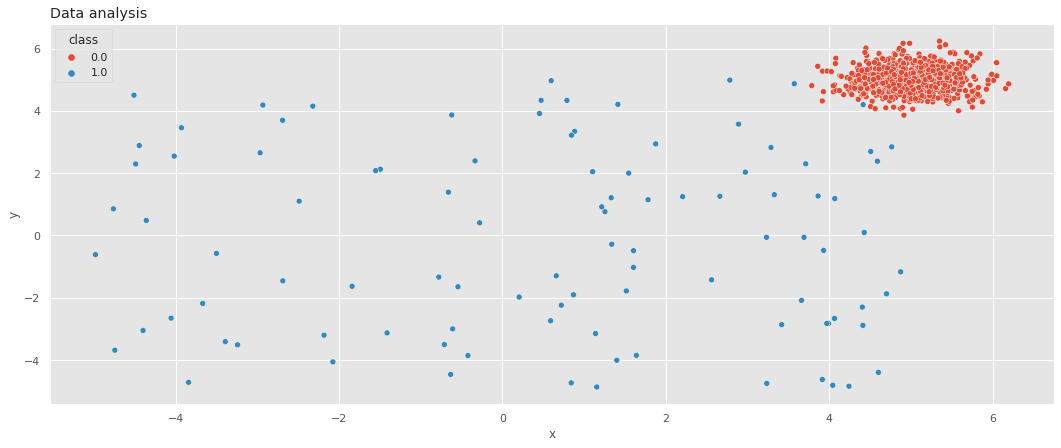

In [47]:
# visualizando graficamente a dispersão dos dados
plt.style.use('ggplot')
plt.figure(figsize=(18,7))
plt.title('Data analysis', loc='left')
sns.scatterplot(data=df, x='x', y='y', hue='class');

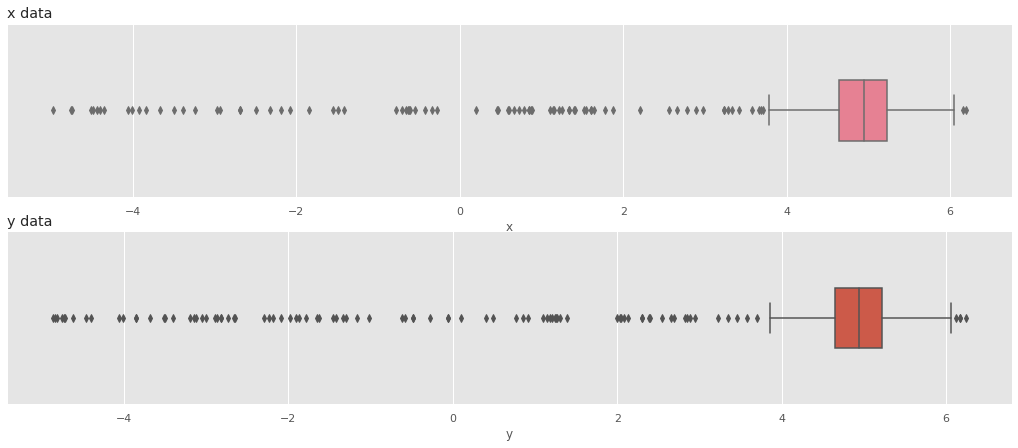

In [48]:
# boxplot 
plt.figure(figsize=(18,7))

plt.subplot(211)
plt.title('x data', loc='left')
sns.boxplot(data=df, x='x', width=0.35, palette='husl');

plt.subplot(212)
plt.title('y data', loc='left')
sns.boxplot(data=df, x='y', width=0.35);

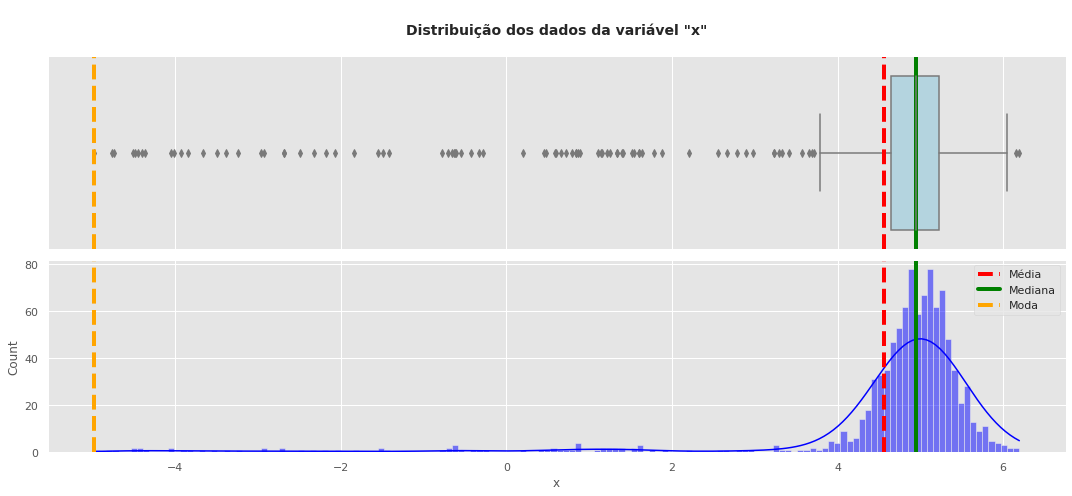

In [49]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "x"
mean = df['x'].mean()     # média
median = df['x'].median() # mediana
mode = df['x'].mode()[0]  # moda

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(15,7))

sns.boxplot(data=df, x='x', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "x"\n',
                 {'fontsize': 14,'fontweight': 'bold'})

sns.histplot(data=df, x='x', ax=ax_hist, kde=True, bins=150, color='blue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

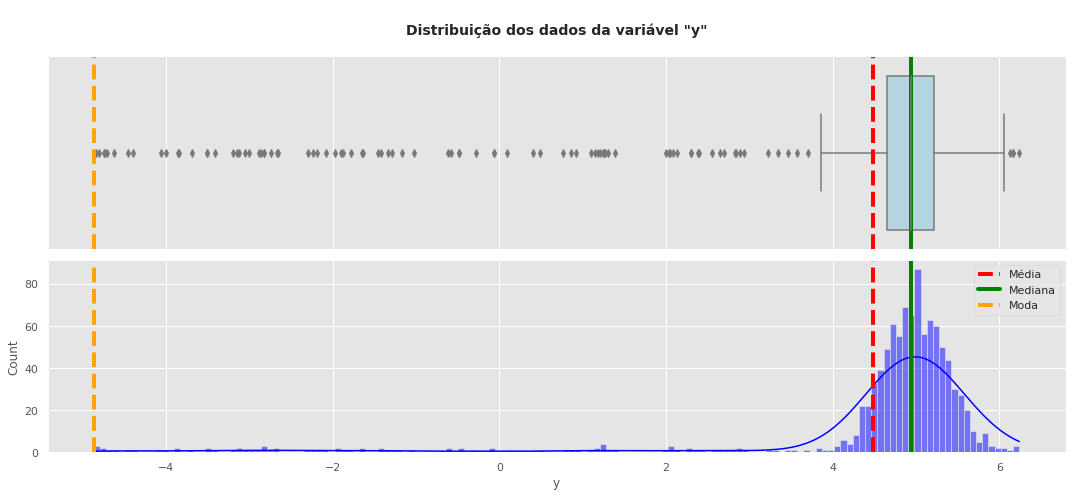

In [50]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "y"
mean = df['y'].mean()     # média
median = df['y'].median() # mediana
mode = df['y'].mode()[0]  # moda

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(15,7))

sns.boxplot(data=df, x='y', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "y"\n',
                 {'fontsize': 14,'fontweight': 'bold'})

sns.histplot(data=df, x='y', ax=ax_hist, kde=True, bins=150, color='blue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [51]:
# importando a função "KNN"
from pyod.models.knn import KNN

In [52]:
# instanciando o modelo KNN
mdl_knn = KNN(
    contamination=0.1,
    n_neighbors=5,
    method='largest',
    radius=1.0,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    n_jobs=-1
)

# visualizando os parâmetros do modelo
mdl_knn

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [53]:
# treinando o modelo
mdl_knn.fit(df.iloc[:, 0:2])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [54]:
# instanciando os rótulos definido pelo modelo
pred = mdl_knn.labels_

# visualizando os 30 primeiros rótulos
print(
    pred[:30], 
    pred[-30:],
    sep='\n\n'
)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [58]:
# contabilizando os valores únicos na variável "pred"
analysis = np.unique(pred, return_counts=True)

# instanciando o fator de confiança da decisão do modelo
conf = mdl_knn.decision_scores_

In [62]:
# concatenando os dados das variáveis "pred" e "conf"
df['predict'] = pred
df['confidence'] = conf

# visualizando 20 amostras aleatórias
df.sample(20)

,x,y,class,predict,confidence
298,5.119338,5.584387,0.0,0,0.074947
80,5.158750,4.850550,0.0,0,0.038687
681,5.122444,4.659650,0.0,0,0.029660
452,5.227378,5.475720,0.0,0,0.049277
354,5.350605,5.276288,0.0,0,0.061870
664,4.684221,4.925503,0.0,0,0.058583
368,4.411590,5.242758,0.0,0,0.070712
11,5.413863,5.094947,0.0,0,0.049026
39,4.382484,5.099780,0.0,0,0.097456
598,4.738872,4.320346,0.0,0,0.125724


In [63]:
# visualizando os dados da variável "analysis"
print(
    f'Report: {analysis}'
)

Report: (array([0, 1]), array([900, 100]))


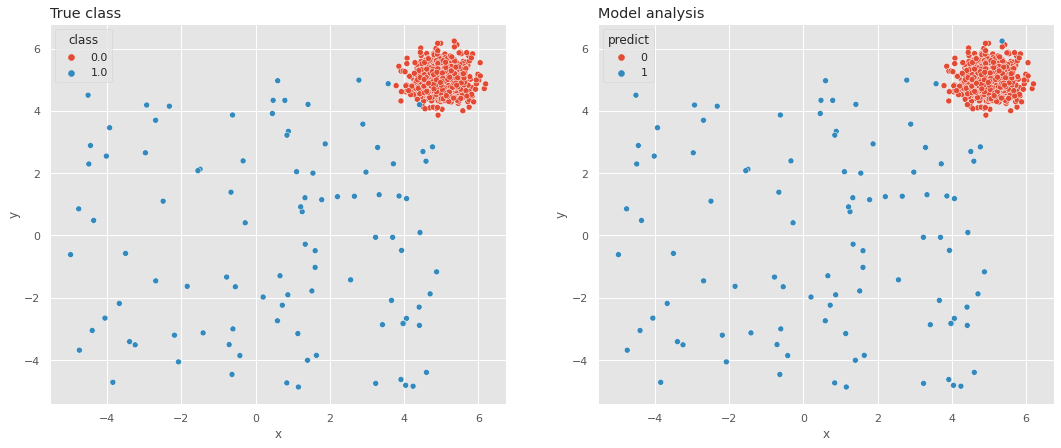

In [70]:
# plotando gráfico da distribuição real dos dados e da análise realizado pelo modelo
plt.style.use('ggplot')
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.title('True class', loc='left')
sns.scatterplot(data=df, x='x', y='y', hue='class');

plt.subplot(1,2,2)
plt.title('Model analysis', loc='left')
sns.scatterplot(data=df, x='x', y='y', hue='predict');

In [67]:
print(
    (df['class'] == 1.0).value_counts(), 
    (df['predict'] == 1.0).value_counts(),
    sep='\n\n'
)

False    900
True     100
Name: class, dtype: int64

False    900
True     100
Name: predict, dtype: int64


In [69]:
# versões das bibliotecas utilizadas neste notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | Subject: Explorando a biblioteca PyOD para detecção de outliers #2022 #TensoFlow' --iversions

Author: Fernando Galvão | Subject: Explorando a biblioteca PyOD para detecção de outliers #2022 #TensoFlow

numpy     : 1.21.6
pandas    : 1.3.5
matplotlib: 3.5.2
seaborn   : 0.11.2

